# Prelude

In [1]:
import landau.phases as ldp
import landau.interpolate as ldi
import landau.calculate as ldc
import landau.plot as lpl

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Temperature Transitions

## Set up basic phases

In [4]:
ldp.LinePhase?

Init signature:
ldp.LinePhase(
    name: str,
    fixed_concentration: float,
    line_energy: float,
    line_entropy: float = 0,
) -> None
Docstring:      Simple phase with a fixed concentration and temperature independent entropy.
File:           ~/science/phd/dev/landau/landau/phases.py
Type:           ABCMeta
Subclasses:     

In [4]:
fcca = ldp.LinePhase("fccA", fixed_concentration=0, line_energy=-3, line_entropy=1*ldp.kB)
hcp = ldp.LinePhase("hcp", fixed_concentration=0, line_energy=-2.975, line_entropy=1.8*ldp.kB)
lqda = ldp.LinePhase("liquidA", fixed_concentration=0, line_energy=-2.75, line_entropy=5*ldp.kB)

Landau does not know about units, but energies should be "per atom" or at least consistent among phases.

## Just Plot Around

`semigrand_potential` is the main method.  For `dmu=0` it is the same as the free energy, otherwise

$$
\phi(\Delta\mu, T) = \min_c f(c, T) - c \Delta\mu
$$

In [5]:
fcca.semigrand_potential?

Signature: fcca.semigrand_potential(T, dmu)
Docstring: Calculate the semigrand potential of the phase.
File:      ~/science/phd/dev/landau/landau/phases.py
Type:      method

In [7]:
Ts = np.linspace(0, 1000)

Text(0, 0.5, '$f$/$\\phi$ [eV/atom]')

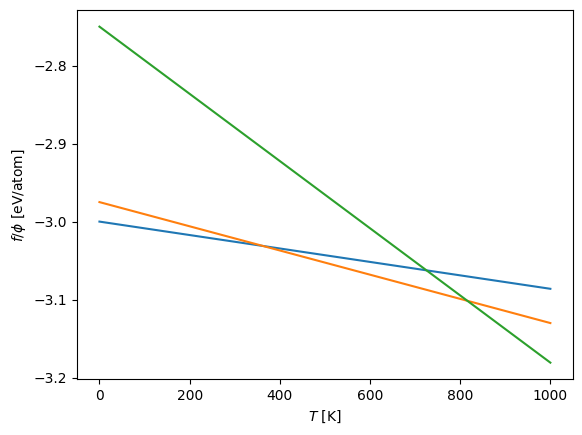

In [8]:
plt.plot(Ts, fcca.semigrand_potential(Ts, 0))
plt.plot(Ts, hcp.semigrand_potential(Ts, 0))
plt.plot(Ts, lqda.semigrand_potential(Ts, 0))
plt.xlabel("$T$ [K]")
plt.ylabel(r"$f$/$\phi$ [eV/atom]")

Crossing points are phase transitions.  How to find them?

In [6]:
Ts = np.linspace(0, 1000, 10)

Simple call to just find stable phases at sample points.

In [7]:
df = ldc.calc_phase_diagram([fcca, hcp, lqda], Ts, mu=0.0, refine=False)

Columns:
- `phi` semigrand potential
- `mu` chemical potential difference between both species
- `stable` True if a stable phase point
- `f` free energy corresponding to `phi`
- `f_excess` excess of the free energy wrt the stable phases

In [8]:
df

,T,phase,phi,mu,c,stable,f,f_excess
0,0.000000,fccA,-3.000000,0.0,0,True,-3.000000,0.0
1,111.111111,fccA,-3.009575,0.0,0,True,-3.009575,0.0
2,222.222222,fccA,-3.019150,0.0,0,True,-3.019150,0.0
3,333.333333,fccA,-3.028724,0.0,0,True,-3.028724,0.0
14,444.444444,hcp,-3.043939,0.0,0,True,-3.043939,0.0
15,555.555556,hcp,-3.061173,0.0,0,True,-3.061173,0.0
16,666.666667,hcp,-3.078408,0.0,0,True,-3.078408,0.0
17,777.777778,hcp,-3.095643,0.0,0,True,-3.095643,0.0
28,888.888889,liquidA,-3.132993,0.0,0,True,-3.132993,0.0
29,1000.000000,liquidA,-3.180867,0.0,0,True,-3.180867,0.0


Additionally refine the phase boundaries.  Adds additional columns `border` and `refined`.
`border` is `True` if the point is a phase transition.
`refined` is a string telling how the point was added.

In [9]:
df = ldc.calc_phase_diagram([fcca, hcp, lqda], Ts, mu=0.0, refine=True)

In [10]:
df

,T,phase,phi,mu,c,stable,border,refined,f,f_excess
0,0.000000,fccA,-3.000000,0.0,0,True,False,no,-3.000000,0.000000e+00
1,111.111111,fccA,-3.009575,0.0,0,True,False,no,-3.009575,0.000000e+00
2,222.222222,fccA,-3.019150,0.0,0,True,False,no,-3.019150,0.000000e+00
3,333.333333,fccA,-3.028724,0.0,0,True,False,no,-3.028724,0.000000e+00
4,444.444444,hcp,-3.043939,0.0,0,True,False,no,-3.043939,0.000000e+00
5,555.555556,hcp,-3.061173,0.0,0,True,False,no,-3.061173,0.000000e+00
6,666.666667,hcp,-3.078408,0.0,0,True,False,no,-3.078408,0.000000e+00
7,777.777778,hcp,-3.095643,0.0,0,True,False,no,-3.095643,0.000000e+00
8,888.888889,liquidA,-3.132993,0.0,0,True,False,no,-3.132993,0.000000e+00
9,1000.000000,liquidA,-3.180867,0.0,0,True,False,no,-3.180867,0.000000e+00


`keep_unstable` can be passed to also retain samples of the unstable phases.

In [11]:
df = ldc.calc_phase_diagram([fcca, hcp, lqda], Ts, mu=0.0, refine=True, keep_unstable=True)

In [12]:
df

,T,phase,phi,mu,c,stable,border,refined,f,f_excess
0,0.000000,fccA,-3.000000,0.0,0,True,False,no,-3.000000,0.000000e+00
1,111.111111,fccA,-3.009575,0.0,0,True,False,no,-3.009575,0.000000e+00
2,222.222222,fccA,-3.019150,0.0,0,True,False,no,-3.019150,0.000000e+00
3,333.333333,fccA,-3.028724,0.0,0,True,False,no,-3.028724,0.000000e+00
4,444.444444,hcp,-3.043939,0.0,0,True,False,no,-3.043939,0.000000e+00
5,555.555556,hcp,-3.061173,0.0,0,True,False,no,-3.061173,0.000000e+00
6,666.666667,hcp,-3.078408,0.0,0,True,False,no,-3.078408,0.000000e+00
7,777.777778,hcp,-3.095643,0.0,0,True,False,no,-3.095643,0.000000e+00
8,888.888889,liquidA,-3.132993,0.0,0,True,False,no,-3.132993,0.000000e+00
9,1000.000000,liquidA,-3.180867,0.0,0,True,False,no,-3.180867,0.000000e+00


A simple plot with `seaborn`.

<Axes: xlabel='T', ylabel='f'>

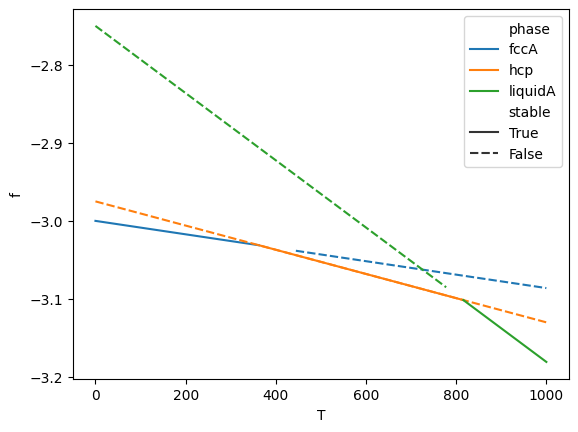

In [16]:
sns.lineplot(
    data=df,
    x='T', y='f',
    hue='phase',
    style='stable', style_order=[True, False],
)

Or using landau

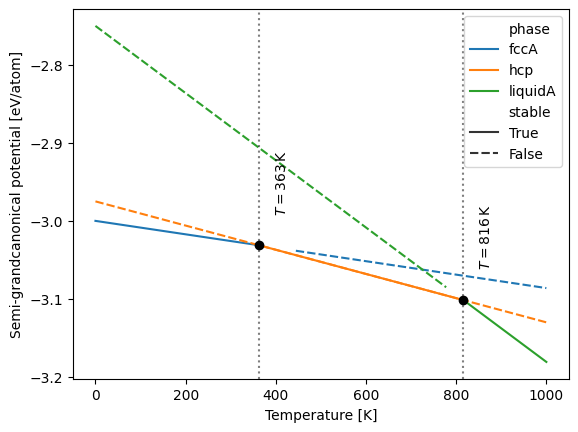

In [13]:
lpl.plot_1d_T_phase_diagram(df)

# Including Concentration

landau implicitly assumes there is only two species and that all `phase` objects agree on which is the 'first' and which is the 'second'.

Phase objects with variable concentration are most easily assembled from objects of fixed concentration, because this is how e.g. `calphy` presents them.

In [17]:
fccb = ldp.LinePhase("fccB", fixed_concentration=1, line_energy=-2, line_entropy=1.1*ldp.kB)

In [18]:
fcc = ldp.IdealSolution('fcc', fcca, fccb)

All phases present the same interface to calculate the semi-grandcanonical potential.

In [19]:
fcc.semigrand_potential?

Signature: fcc.semigrand_potential(T, dmu)
Docstring: Calculate the semigrand potential of the phase.
File:      ~/science/phd/dev/landau/landau/phases.py
Type:      method

In [20]:
mus = np.linspace(0, 2)

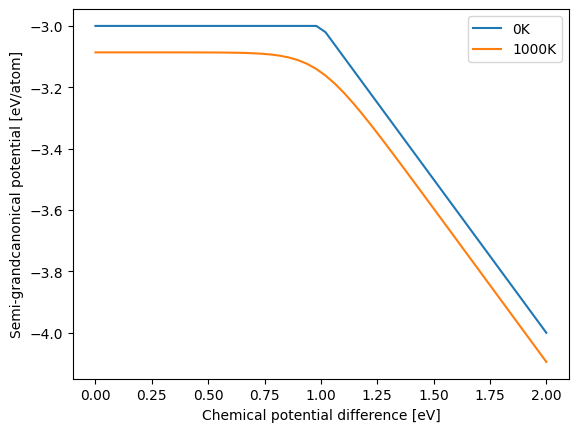

In [21]:
plt.plot(mus, fcc.semigrand_potential(   0, mus), label='0K')
plt.plot(mus, fcc.semigrand_potential(1000, mus), label='1000K')
plt.xlabel("Chemical potential difference [eV]")
plt.ylabel("Semi-grandcanonical potential [eV/atom]")
plt.legend()

Chemical potential range can also be guessed.

In [22]:
ldc.guess_mu_range([fcc], T=1000, samples=100)

(array([0.20348167, 0.59702767, 0.65649822, 0.69224108, 0.71784655,
        0.73785687, 0.75505521, 0.76873383, 0.7816471 , 0.79224485,
        0.8028426 , 0.81167202, 0.82000879, 0.82834556, 0.83561447,
        0.84230052, 0.84898658, 0.85567263, 0.86147831, 0.86697089,
        0.87246348, 0.87795607, 0.88344865, 0.88811217, 0.89275789,
        0.89740361, 0.90204934, 0.90669506, 0.91113655, 0.9152035 ,
        0.91927046, 0.92333741, 0.92740436, 0.93147132, 0.93553827,
        0.93926782, 0.94297044, 0.94667306, 0.95037569, 0.95407831,
        0.95778093, 0.96148355, 0.96502695, 0.9685459 , 0.97206486,
        0.97558381, 0.97910276, 0.98262172, 0.98614067, 0.98965083,
        0.99314975, 0.99664867, 1.0001476 , 1.00364652, 1.00714544,
        1.01064436, 1.01414329, 1.01777959, 1.02142026, 1.02506093,
        1.0287016 , 1.03234227, 1.03598294, 1.03962362, 1.04351443,
        1.04747176, 1.0514291 , 1.05538644, 1.05934378, 1.06330112,
        1.06735489, 1.07183317, 1.07631146, 1.08

In [23]:
mus, *_ = ldc.guess_mu_range([fcc], T=1000, samples=100)

Isothermals are available via the `concentration` method.

In [24]:
fcc.concentration?

Signature: fcc.concentration(T, dmu)
Docstring: Concentration of the phase at the given state.
File:      ~/science/phd/dev/landau/landau/phases.py
Type:      method

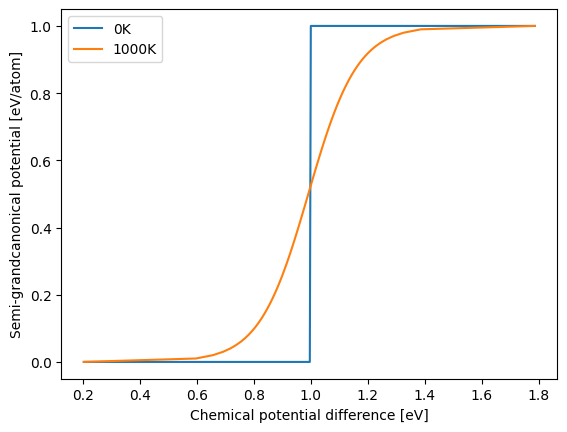

In [25]:
plt.plot(mus, fcc.concentration(   0, mus), label='0K')
plt.plot(mus, fcc.concentration(1000, mus), label='1000K')
plt.xlabel("Chemical potential difference [eV]")
plt.ylabel("Semi-grandcanonical potential [eV/atom]")
plt.legend()

Again, phase transitions are determined by the intersection points.

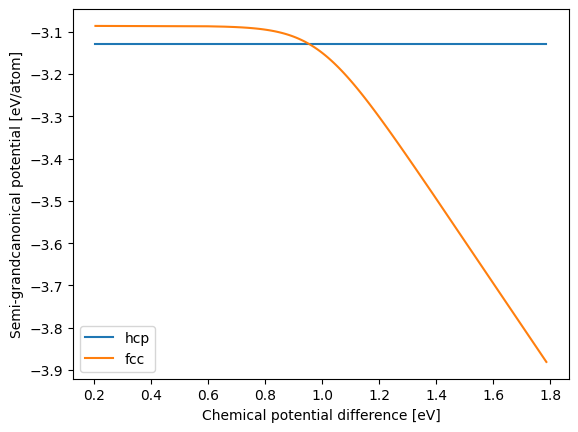

In [26]:
plt.plot(mus, hcp.semigrand_potential(1000, mus), label='hcp')
plt.plot(mus, fcc.semigrand_potential(1000, mus), label='fcc')
plt.xlabel("Chemical potential difference [eV]")
plt.ylabel("Semi-grandcanonical potential [eV/atom]")
plt.legend()

In [27]:
df = ldc.calc_phase_diagram([hcp, fcc], Ts=1000, mu=100, keep_unstable=True)

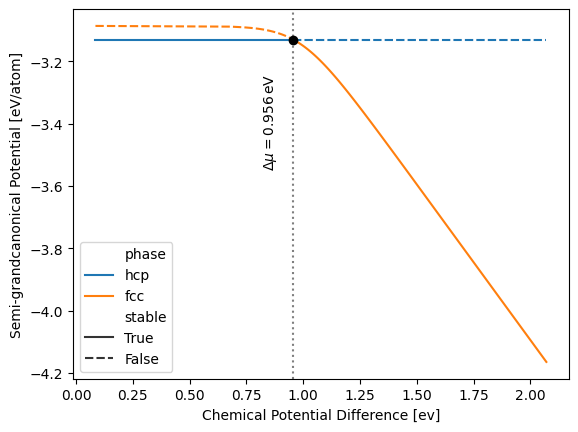

In [28]:
lpl.plot_1d_mu_phase_diagram(df)

Adding a liquid phase as well and finally plotting the full diagram.

In [29]:
lqdb = ldp.LinePhase("liquidB", fixed_concentration=1, line_energy=-1.75, line_entropy=4.4*ldp.kB)
lqd = ldp.IdealSolution('liquid', lqda, lqdb)

In [30]:
%%time
Ts = np.linspace(200, 1000)
df = ldc.calc_phase_diagram([hcp, fcc, lqd], Ts, mu=100)

CPU times: user 9.25 s, sys: 28.1 ms, total: 9.28 s
Wall time: 9.47 s


In [31]:
df

,T,phase,phi,mu,c,stable,border,refined,f,f_excess
0,363.265306,hcp,-3.031347,0.071558,0.000000,True,False,no,-3.031347,0.000000
1,363.265306,hcp,-3.031347,0.666803,0.000000,True,False,no,-3.031347,0.000000
2,363.265306,hcp,-3.031347,0.725566,0.000000,True,False,no,-3.031347,0.000000
3,363.265306,hcp,-3.031347,0.763493,0.000000,True,False,no,-3.031347,0.000000
4,363.265306,hcp,-3.031347,0.786336,0.000000,True,False,no,-3.031347,0.000000
...,...,...,...,...,...,...,...,...,...,...
15676,775.739665,liquid,-3.107430,0.981266,0.293128,True,True,delaunay,-2.819794,-0.046578
15677,775.739665,fcc,-3.107430,0.981266,0.455061,True,True,delaunay,-2.660894,0.086591
15678,761.269186,fcc,-3.093082,0.950580,0.342236,True,True,delaunay-triple,-2.767759,0.213985
15679,761.269186,liquid,-3.093082,0.950580,0.205324,True,True,delaunay-triple,-2.897905,0.128380


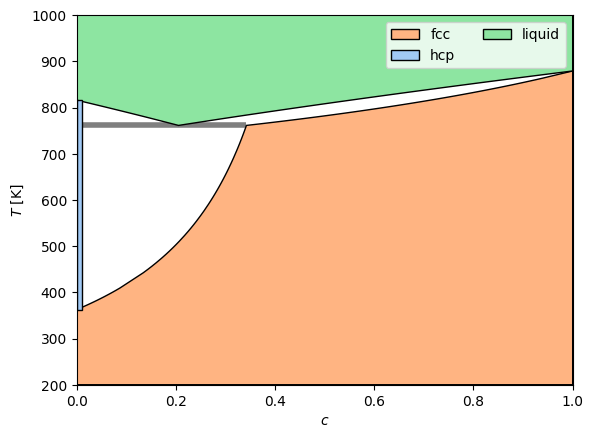

In [32]:
lpl.plot_phase_diagram(df, min_c_width=0.01, tielines=True)

Can also plot in mu/T space.

In [33]:
%%time
Ts = np.linspace(200, 1000, 100)
mus = np.linspace(0.5, 1.5, 100)
df = ldc.calc_phase_diagram([hcp, fcc, lqd], Ts, mu=mus)

CPU times: user 13.7 s, sys: 49.2 ms, total: 13.8 s
Wall time: 14.1 s


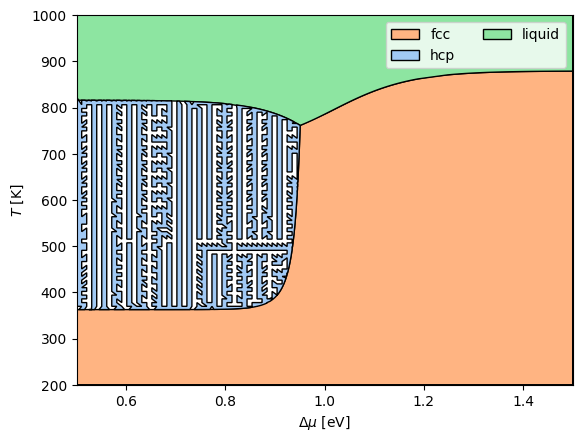

In [34]:
lpl.plot_mu_phase_diagram(df, alpha=0.1)

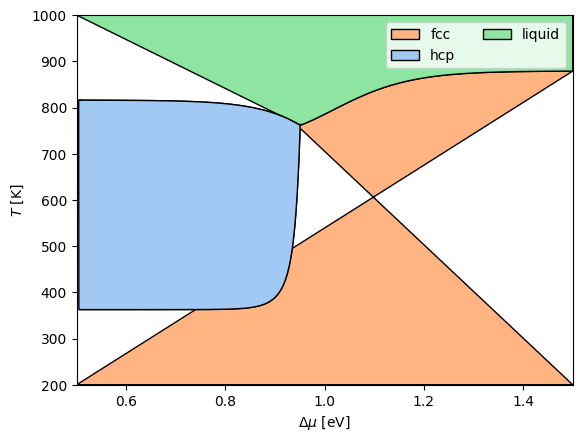

In [40]:
lpl.plot_mu_phase_diagram(df, alpha=0.1, poly_method='segments')

Some existing problems with "pretty" polygon plotting.